# Connect to google acount

In [1]:
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [2]:
# 코렙 한글깨짐 방지
!apt -qq -y install fonts-nanum > /dev/null

# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath).get_name() 
fm._rebuild()  


%config InlineBackend.figure_format = 'retina'

plt.rc('font', family=font_name)  
plt.rcParams['axes.unicode_minus'] = False 

# Global variables

In [3]:
import easydict
args = easydict.EasyDict()

args.default_path = '/content/data/MyDrive/lecture/data/titanic/'
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'


# 데이터 분석을 위한 변수들
args.random_state = 42

# Load Data

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

plt.ion()

In [5]:
train = pd.read_csv(args.train_csv)
test = pd.read_csv(args.test_csv)

train.shape, test.shape

((891, 12), (418, 11))

In [6]:
train.columns = [col.lower() for col in train.columns] # 컬럼명 소문자로 변환
test.columns = [col.lower() for col in test.columns] # 컬럼명 소문자로 변환

train.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [7]:
train['passengerid'].nunique(), train.shape[0]

(891, 891)

In [8]:
train.drop('passengerid', axis=1, inplace=True)
test.drop('passengerid', axis=1, inplace=True)

train.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

# EDA(Exploratory Data Analysis)

## Target Value

In [9]:
new_survived = pd.Categorical(train["survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])              

new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


## Missing Value

In [10]:
(train.isnull() / train.shape[0]).sum().sort_values(ascending=False)

cabin       0.771044
age         0.198653
embarked    0.002245
survived    0.000000
pclass      0.000000
name        0.000000
sex         0.000000
sibsp       0.000000
parch       0.000000
ticket      0.000000
fare        0.000000
dtype: float64

## Analysing The Features

- Surived:0=사망, 1=생존
- Pclass: 1=1등석, 2=2등석, 3=3등석
- Sex:male=남성, female=여성
- Age: 나이
- SibSp: 타이타닉 호에 동승한 자매/배우자의 수
- Parch: 타이타닉 호에 동승한 부모/자식의 수
- Ticket: 티켓 번호
- Fare: 승객 요금
- Cabin: 방 호수
- Embarked: 탑승지; C=셰르부르, Q=퀴즈타운, S=사우샘프턴

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Continous Features
> age, fare

In [12]:
df_continouse = train[['age', 'fare', 'survived']].copy()
df_continouse.shape

(891, 3)

In [13]:
df_continouse.describe()

,age,fare,survived
count,714.000000,891.000000,891.000000
mean,29.699118,32.204208,0.383838
std,14.526497,49.693429,0.486592
min,0.420000,0.000000,0.000000
25%,20.125000,7.910400,0.000000
50%,28.000000,14.454200,0.000000
75%,38.000000,31.000000,1.000000
max,80.000000,512.329200,1.000000


In [14]:
df_continouse.corr()

,age,fare,survived
age,1.000000,0.096067,-0.077221
fare,0.096067,1.000000,0.257307
survived,-0.077221,0.257307,1.000000


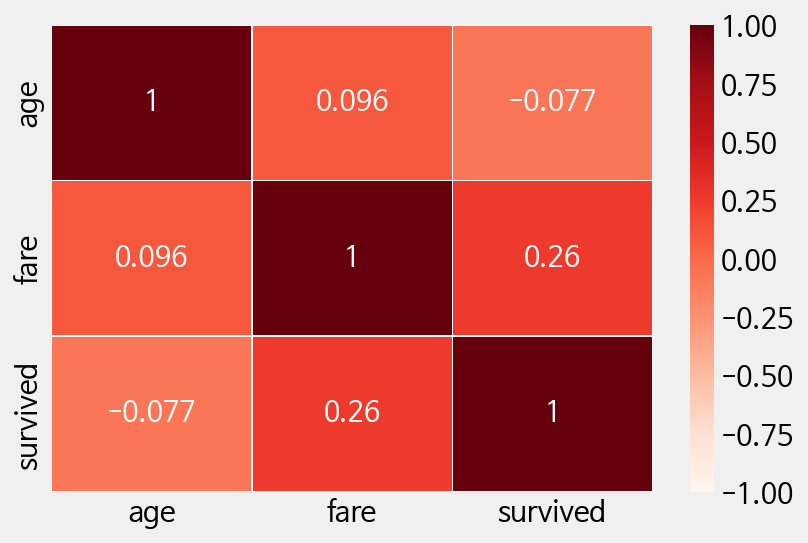

In [15]:
sns.heatmap(df_continouse.corr(),vmin=-1,vmax=1,annot=True,linewidths=0.2,cmap='Reds')

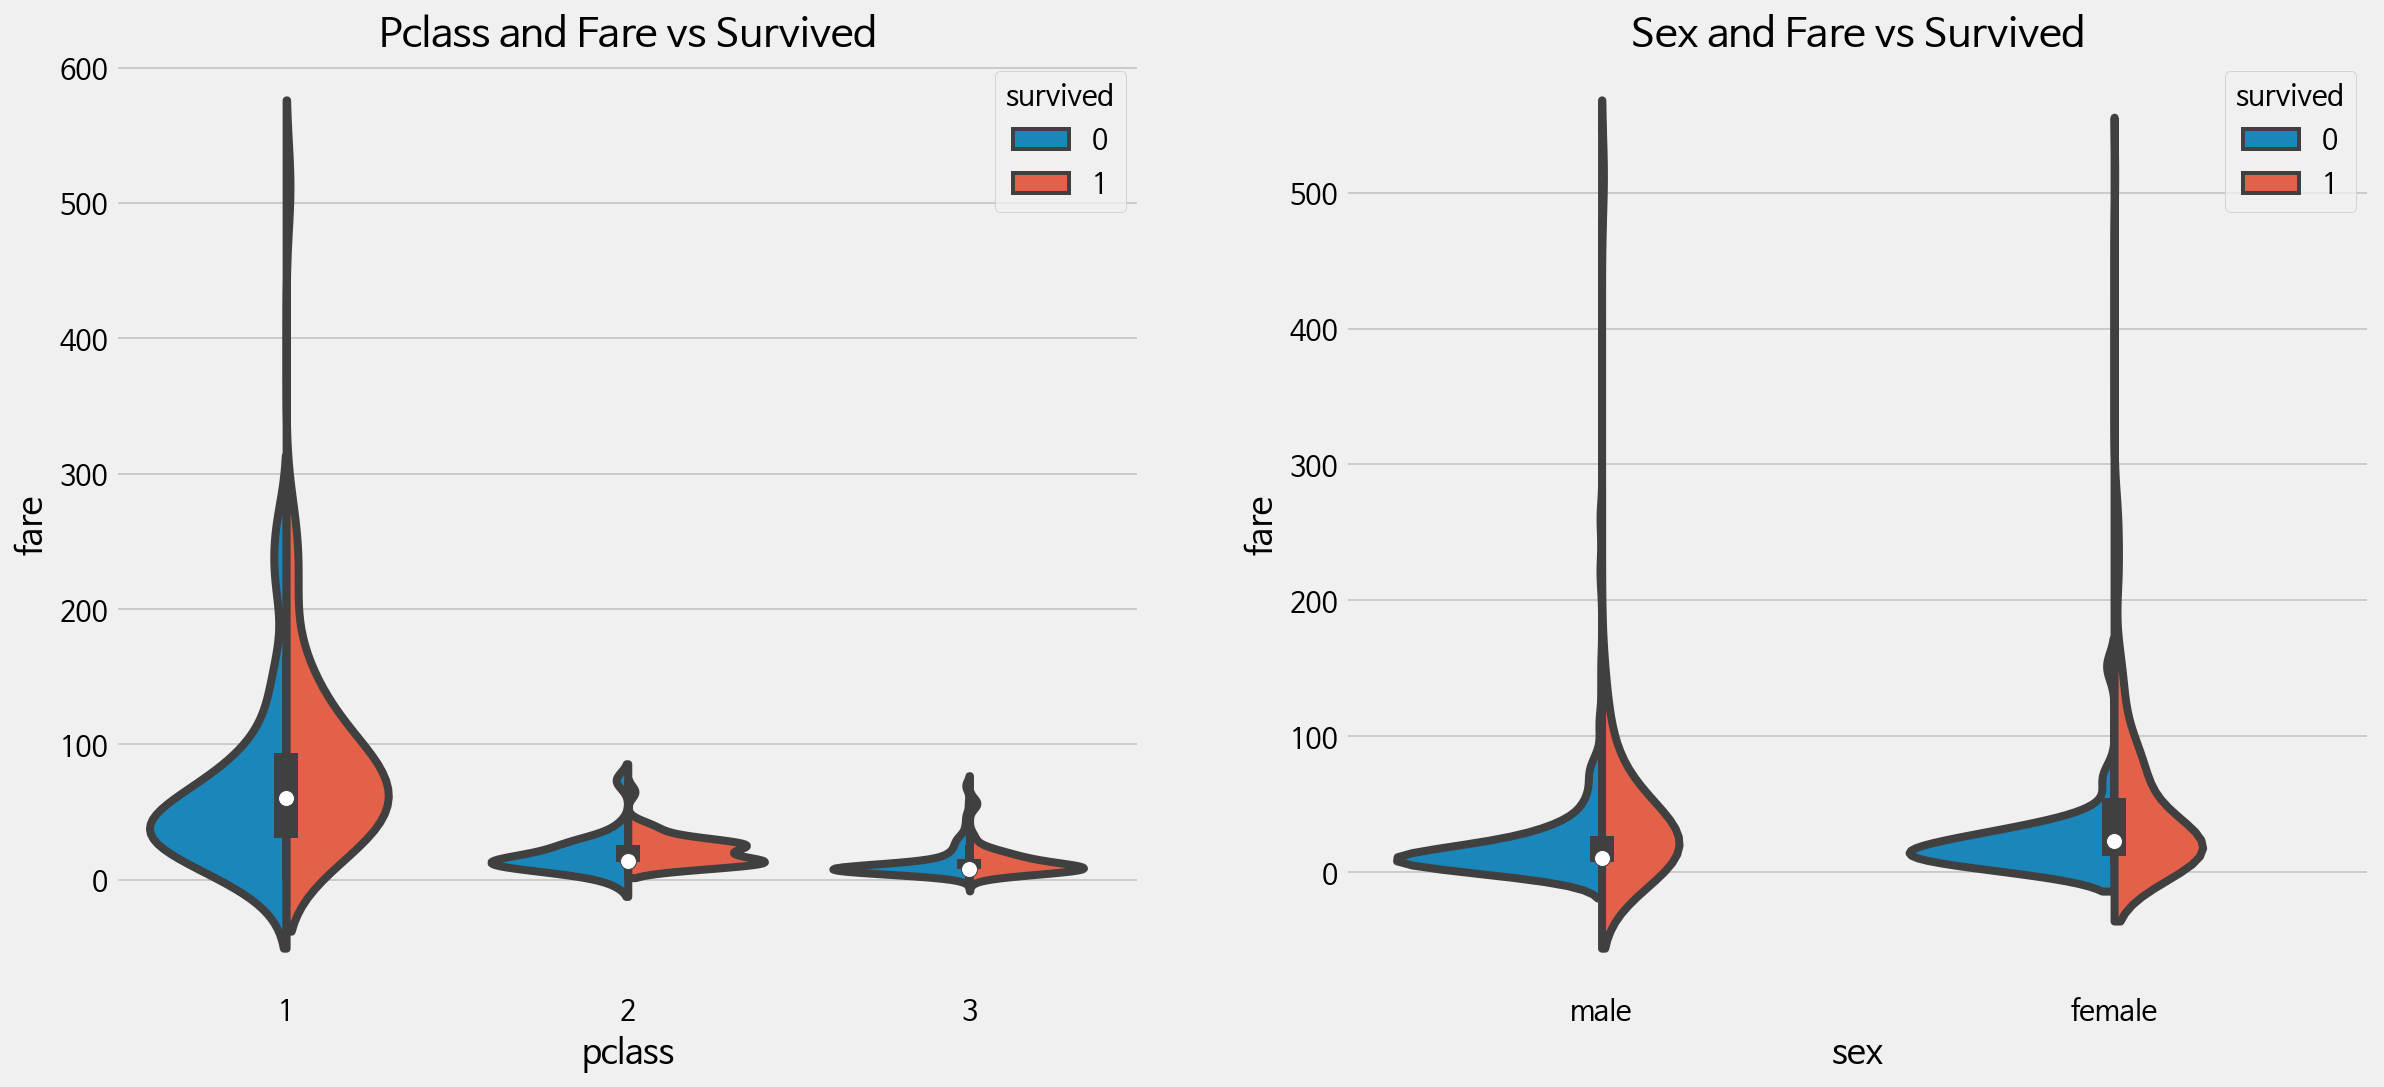

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot("pclass","fare", hue="survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Fare vs Survived')
# ax[0].set_yticks(range(0,110,10))

sns.violinplot("sex","fare", hue="survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Fare vs Survived')
# ax[1].set_yticks(range(0,110,10))
plt.show()

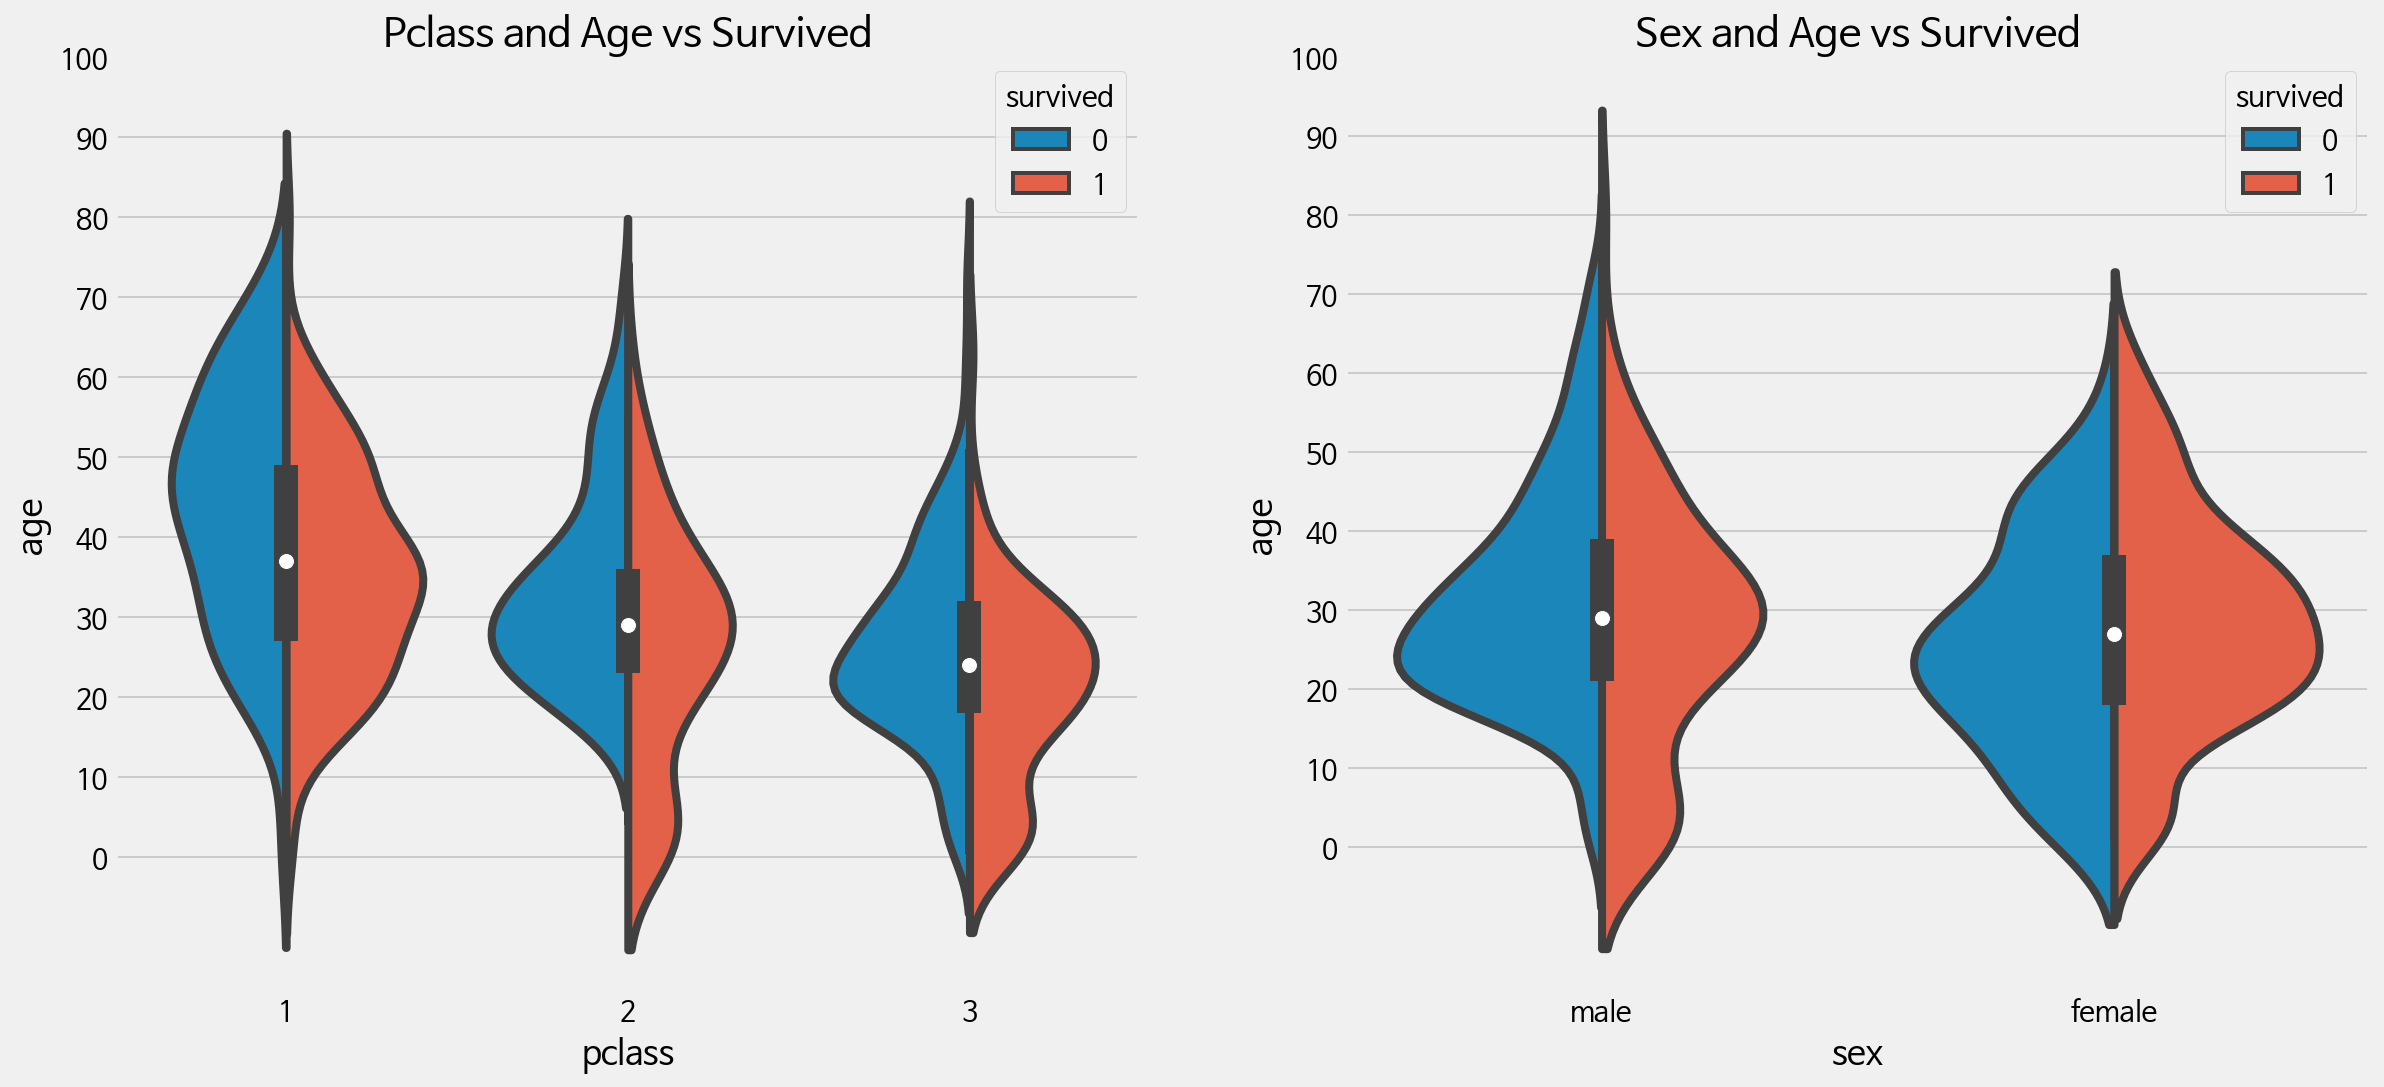

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot("pclass","age", hue="survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("sex","age", hue="survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### Ordinal Features
> pclass, sibsp, parch, cabin

In [18]:
df_ordinal = train[['pclass', 'sibsp', 'parch', 'cabin', 'survived']].copy()
df_ordinal.shape

(891, 5)

In [19]:
df_ordinal.describe(include='all')

,pclass,sibsp,parch,cabin,survived
count,891.000000,891.000000,891.000000,204,891.000000
unique,NaN,NaN,NaN,147,NaN
top,NaN,NaN,NaN,B96 B98,NaN
freq,NaN,NaN,NaN,4,NaN
mean,2.308642,0.523008,0.381594,NaN,0.383838
std,0.836071,1.102743,0.806057,NaN,0.486592
min,1.000000,0.000000,0.000000,NaN,0.000000
25%,2.000000,0.000000,0.000000,NaN,0.000000
50%,3.000000,0.000000,0.000000,NaN,0.000000
75%,3.000000,1.000000,0.000000,NaN,1.000000


In [20]:
df_ordinal['sibsp'] = df_ordinal['sibsp'].astype('category')
df_ordinal['parch'] = df_ordinal['parch'].astype('category')
df_ordinal['survived'] = df_ordinal['survived'].astype('category')

In [21]:
df_ordinal.describe()

,pclass
count,891.000000
mean,2.308642
std,0.836071
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


In [22]:
def bar_plot(variable):
    if variable not in ['survived', 'cabin']:
        sns.displot(df_ordinal, x=variable, hue="survived", multiple="dodge", stat="probability")

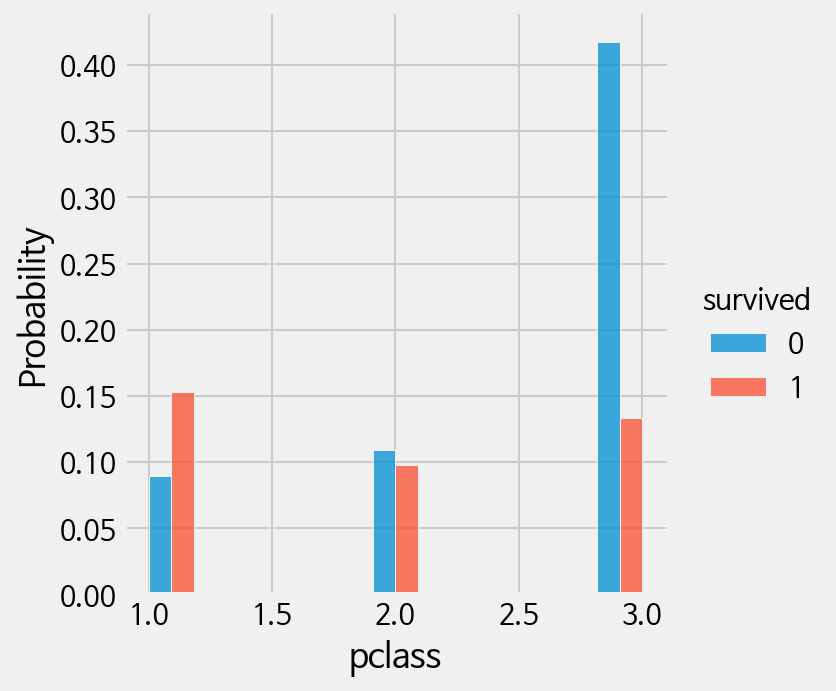

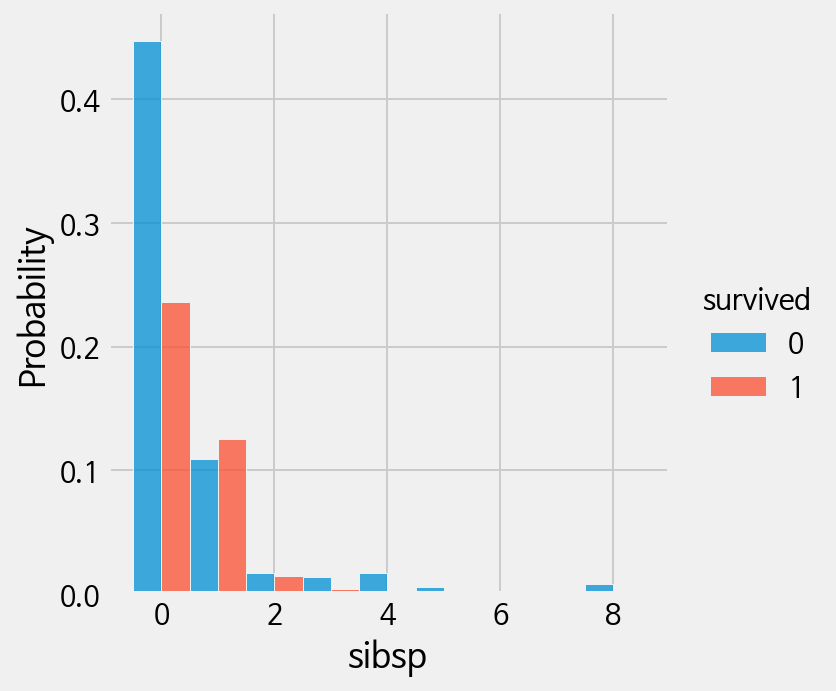

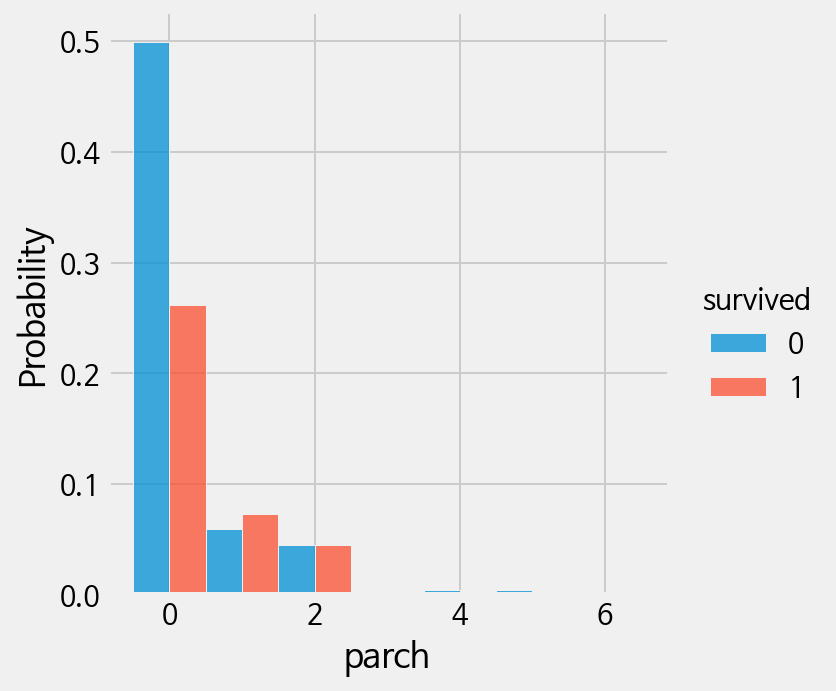

In [23]:
for col in df_ordinal.columns:
    bar_plot(col)

### Categorical Features
> sex, ticket, embarked

In [24]:
df_categorical = train[['sex', 'ticket', 'embarked', 'survived']].copy()
df_categorical.shape

(891, 4)

In [25]:
df_categorical.describe(include='all')

,sex,ticket,embarked,survived
count,891,891,889,891.000000
unique,2,681,3,NaN
top,male,347082,S,NaN
freq,577,7,644,NaN
mean,NaN,NaN,NaN,0.383838
std,NaN,NaN,NaN,0.486592
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,1.000000


In [26]:
df_categorical['survived'] = df_categorical['survived'].astype('category')

In [27]:
df_categorical.describe()

,sex,ticket,embarked,survived
count,891,891,889,891
unique,2,681,3,2
top,male,347082,S,0
freq,577,7,644,549


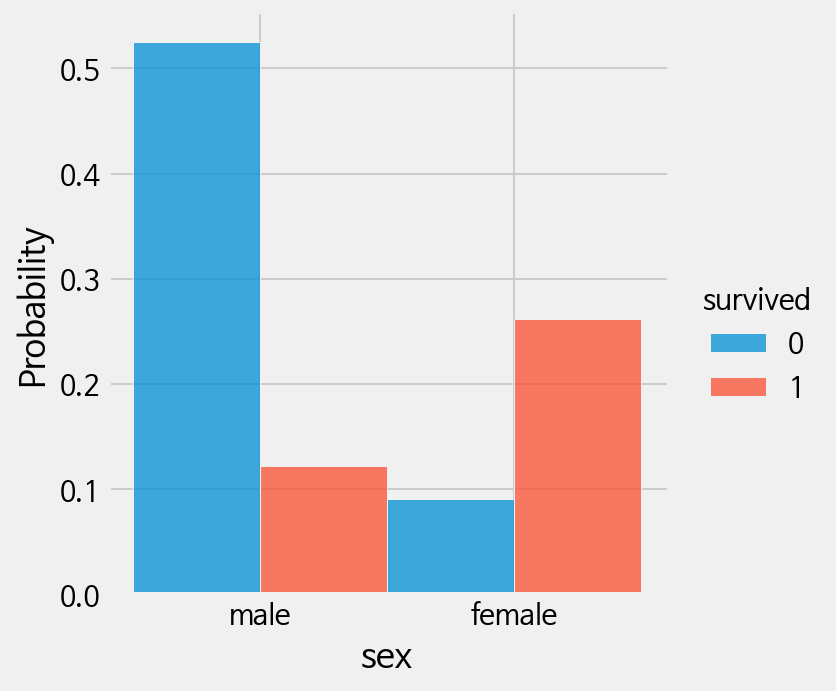

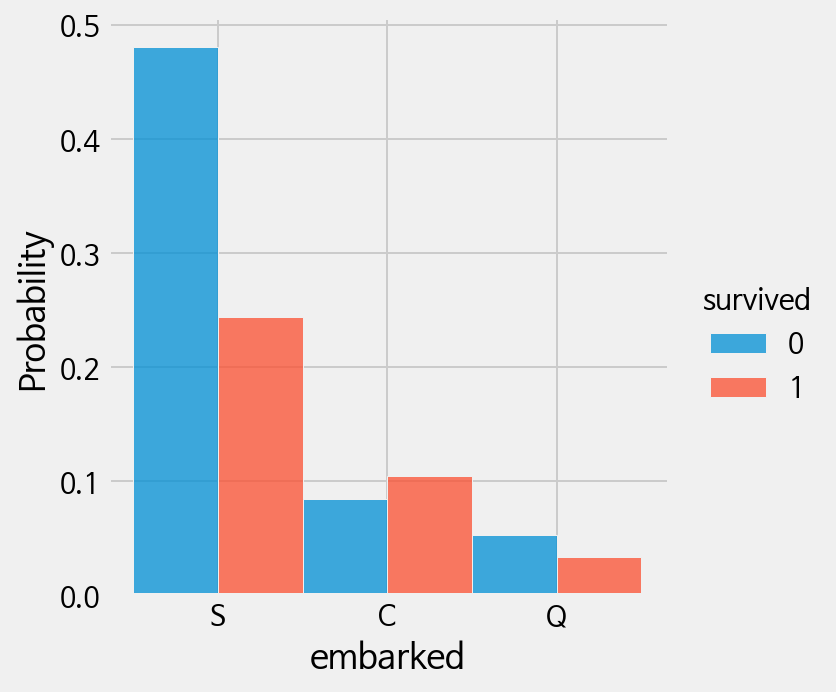

In [28]:
def bar_plot(variable):
    if variable not in ['survived', 'ticket']:
        sns.displot(df_categorical, x=variable, hue="survived", multiple="dodge", stat="probability")

for col in df_categorical.columns:
    bar_plot(col)

## Observations

In [29]:
df_observation = train.copy()
df_observation.shape

(891, 11)

### add Initial_name

In [30]:
df_observation['Initial_name']=None
for i in df_observation:
    df_observation['Initial_name']=df_observation.name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

print(f'Initial null count: {df_observation["Initial_name"].isnull().sum()}')
df_observation.head()

Initial null count: 0


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,Initial_name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [32]:
pd.crosstab(df_observation.Initial_name,df_observation.sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial_name,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [33]:
df_observation['Initial_name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

### add Initial_name_type

In [34]:
dict_initial = {
    'Mr': 'Others',
    'Master': 'Others',
    'Miss': 'Others',
    'Mrs': 'Others',
    'Ms': 'Others',
    'Mlle': 'Others',
    # 직업
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Major': 'Officer',
    'Col': 'Officer',
    'Capt': 'Officer',
    # 귀족
    'Don': 'Royalty',
    'Sir': 'Royalty',
    'Lady': 'Royalty',
    'Mme': 'Royalty',
    'Countess': 'Royalty',
    'Jonkheer': 'Royalty'
}

In [35]:
df_observation['Initial_name_type'] = df_observation['Initial_name'].map(dict_initial)

print(f'Initial_type null count: {df_observation["Initial_name_type"].isnull().sum()}')
df_observation.head()

Initial_type null count: 0


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,Initial_name,Initial_name_type
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Others
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Others
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Others
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Others
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Others


### add initial_cabin

In [36]:
def add_initial_cabin(cabin):
  try:
    cabin = cabin.strip()
    return cabin[:1]
  except:
    return 'unknown'

df_observation['initial_cabin'] = df_observation['cabin'].map(lambda cabin: add_initial_cabin(cabin))

print(f'initial_cabin null count: {df_observation["initial_cabin"].isnull().sum()} / cabin null count: {df_observation["cabin"].isnull().sum()}')
df_observation.head()

initial_cabin null count: 0 / cabin null count: 687


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,Initial_name,Initial_name_type,initial_cabin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Others,unknown
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Others,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Others,unknown
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Others,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Others,unknown


In [37]:
df_observation.tail()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,Initial_name,Initial_name_type,initial_cabin
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Rev,Officer,unknown
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss,Others,B
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss,Others,unknown
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr,Others,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr,Others,unknown


# Data Cleansing

## Data Type Conversion

### number

In [38]:
df_number = train.select_dtypes(include=np.number)
df_number.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
# survived
train["survived"] = train["survived"].astype("int32")
#test["survived"] = test["survived"].astype("int32")

In [40]:
# pclass
train['pclass'].unique()

array([3, 1, 2])

In [41]:
train["pclass"] = train["pclass"].astype("category")
test["pclass"] = test["pclass"].astype("category")